In [85]:
import pandas as pd
import numpy as np
from scipy.special import beta, betainc
from scipy.stats import beta as beta_dist
from scipy.stats import norm as norm_dist

In [86]:
class PERT:
    def __init__(self, min_val, ml_val, max_val, lamb=4):
        self.a = min_val
        self.b = ml_val
        self.c = max_val
        self.lamb = lamb
        
        self.build()
        
    def build(self):
        self.alpha = 1 + (self.lamb * ((self.b-self.a) / (self.c-self.a)))
        self.beta = 1 + (self.lamb * ((self.c-self.b) / (self.c-self.a)))      
        
        self.mean = (self.a + (self.lamb*self.b) + self.c) / (2+self.lamb)
        self.var = ((self.mean-self.a) * (self.c-self.mean)) / (self.lamb+3)
        self.skew = (
            2 * (self.beta - self.alpha) * np.sqrt(self.alpha + self.beta + 1)
        ) / (
            (self.alpha + self.beta + 2) * np.sqrt(self.alpha * self.beta)
        )
        self.kurt = (
            (self.lamb+2) * ((
                ((self.alpha - self.beta)**2) * (self.alpha + self.beta + 1)
            ) + (
                self.alpha * self.beta * (self.alpha + self.beta + 2)
            ))
        ) / (
            self.alpha * self.beta * (self.alpha + self.beta + 2) * (self.alpha + self.beta + 3)
        )
        
    @property
    def range(self):
        return self.c - self.a
        
    def ci(self, z):
        alpha = norm_dist.cdf(z) - norm_dist.cdf(-z)
        interval = beta_dist.interval(alpha, self.alpha, self.beta)
        interval = pd.concat([(val * self.range) + self.a for val in interval], axis=1)
        interval.columns = ('low', 'high')
        return interval
    
    def pdf(self, val):
        x = ((val - self.a) / self.range).clip(0,1)
        pdf_val = beta_dist.pdf(x, self.alpha, self.beta) / self.range
        return pdf_val
    
    def cdf(self, val):
        x = ((val - self.a) / self.range).clip(0,1)
        cdf_val = beta_dist.cdf(x, self.alpha, self.beta) / self.range
        return cdf_val

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

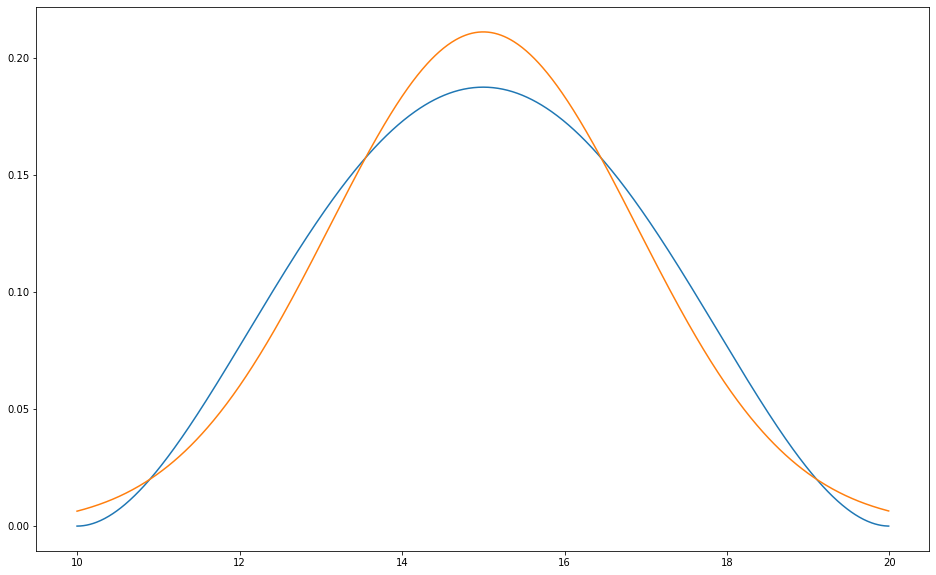

In [88]:
pert = PERT(10, 15, 20, lamb=4)
x = np.arange(10, 20, 0.01)
y1 = pert.pdf(x)
y2 = norm_dist(pert.mean, np.sqrt(pert.var)).pdf(x)

plt.figure(figsize=(16,10))
sns.lineplot(x=x, y=y1)
sns.lineplot(x=x, y=y2)

In [97]:
y1.sum() * 0.01

0.9999999999990214